<a href="https://colab.research.google.com/github/pablex72/time-series-crop/blob/main/spline_interpolation_crop_only_fill_gaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

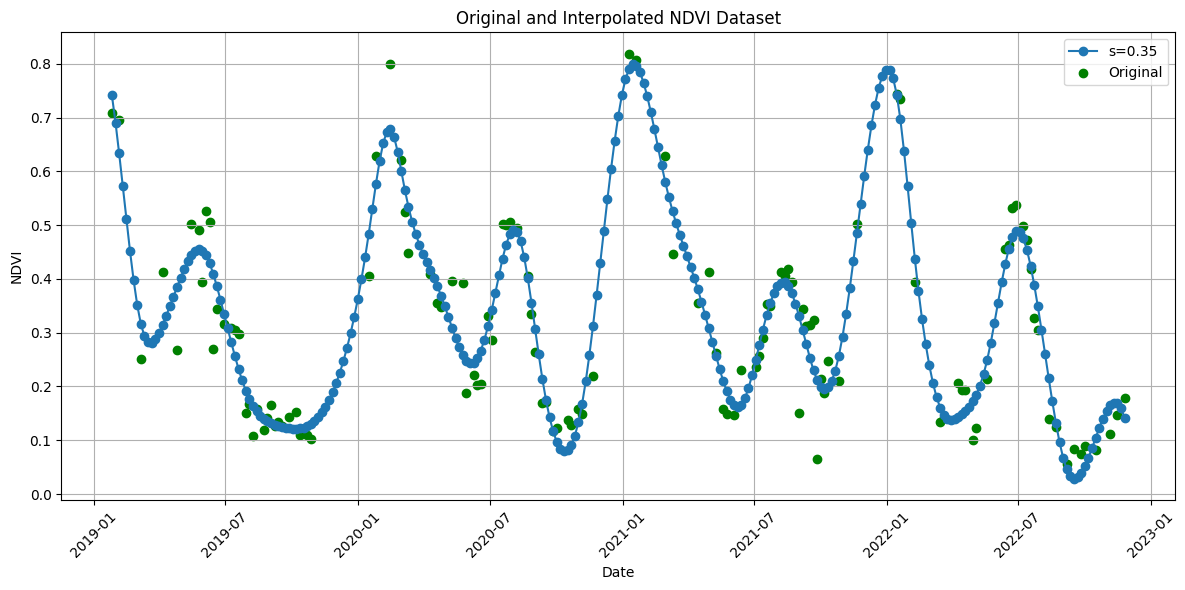

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

df = pd.read_csv('/content/s2-r2-2019-2022-correct-2.csv')

# Convert the "Date" column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Generate a regular date range with the desired interval
start_date = df["Date"].min()
end_date = df["Date"].max()
date_range = pd.date_range(start=start_date, end=end_date, freq="5D")

# Reindex the DataFrame with the new date range
df = df.set_index("Date")
df = df.reindex(date_range)

# Replace missing values with NaN
df["NDVI"] = df["NDVI"].replace(0, np.nan)


# Interpolate missing values using UnivariateSpline for different values of s
x = np.arange(len(df))
mask = ~np.isnan(df["NDVI"])
s_values = [0.35]
interpolated_values = []

for s in s_values:
    spline = UnivariateSpline(x[mask], df["NDVI"][mask], k=3, s=s)
    interpolated_values.append(spline(x))

# Reset the index and rename the columns
df = df.reset_index()
df = df.rename(columns={"index": "Date"})

# Plot the original and interpolated datasets for different values of s
plt.figure(figsize=(12, 6))
# Plot interpolated datasets for different values of s
for i, s in enumerate(s_values):
    plt.plot(df["Date"], interpolated_values[i], "o-", label=f"s={s}")
# Plot original data
plt.scatter(df["Date"], df["NDVI"], label="Original",color ="green")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original and Interpolated NDVI Dataset")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


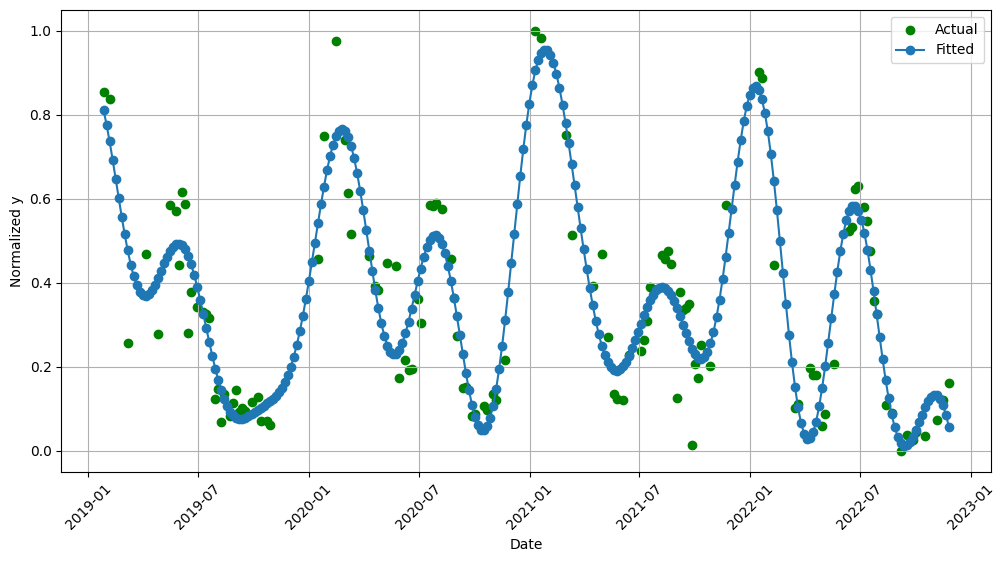

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read the data from a CSV file
df = pd.read_csv('/content/sr-NaN-mod.csv')

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

# Replace empty values with NaN
df['y'] = df['y'].replace('', np.nan)

# Normalize the data using min-max normalization
df['time'] = (df['date'] - df['date'].min()) / (df['date'].max() - df['date'].min())
df['y'] = (df['y'] - df['y'].min()) / (df['y'].max() - df['y'].min())

# Add harmonic terms as independent variables
harmonics = 11  # Number of harmonic terms to include  #############################################################
for i in range(1, harmonics + 1):
    df['cos{}'.format(i)] = np.cos(i * df['time'] * 2 * np.pi)
    df['sin{}'.format(i)] = np.sin(i * df['time'] * 2 * np.pi)

# Add constant term
df['constant'] = 1

# Perform the linear regression
X = df.drop(['date', 'y'], axis=1)
y = df['y']
model = sm.OLS(y, X, missing='drop')  # Specify 'missing' parameter to handle missing values
results = model.fit()

# Print the model summary
#print(results.summary())

# Predict the fitted values
fitted_values = results.predict(X)


plt.figure(figsize=(12, 6))

# Plot the actual data and the fitted values
plt.scatter(df['date'], df['y'], label='Actual',color ="green")
#plt.scatter(df["date"], df["y"], "x-", label="Actual",color ="yellow")

plt.plot(df['date'], fitted_values, "o-",label='Fitted')
plt.xlabel('Date')
plt.ylabel('Normalized y')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

plt.show()

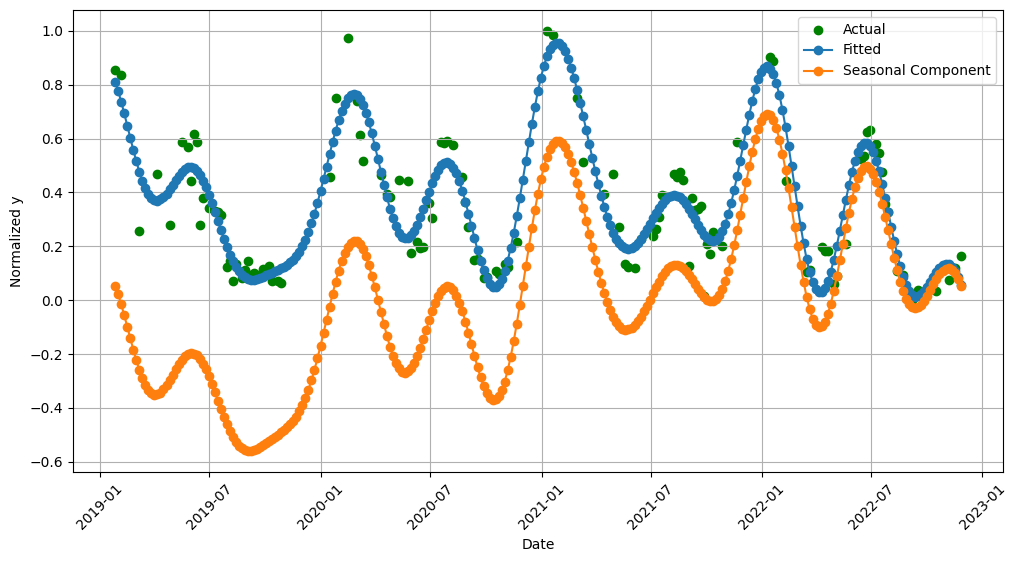

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read the data from a CSV file
df = pd.read_csv('/content/sr-NaN-mod.csv')

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

# Replace empty values with NaN
df['y'] = df['y'].replace('', np.nan)

# Normalize the data using min-max normalization
df['time'] = (df['date'] - df['date'].min()) / (df['date'].max() - df['date'].min())
df['y'] = (df['y'] - df['y'].min()) / (df['y'].max() - df['y'].min())

# Add harmonic terms as independent variables
harmonics = 11  # Number of harmonic terms to include
for i in range(1, harmonics + 1):
    df['cos{}'.format(i)] = np.cos(i * df['time'] * 2 * np.pi)
    df['sin{}'.format(i)] = np.sin(i * df['time'] * 2 * np.pi)

# Add constant term
df['constant'] = 1

# Perform the linear regression
X = df.drop(['date', 'y'], axis=1)
y = df['y']
model = sm.OLS(y, X, missing='drop')  # Specify 'missing' parameter to handle missing values
results = model.fit()

# Print the model summary
# print(results.summary())

# Predict the fitted values
fitted_values = results.predict(X)

# Extract the coefficients of the harmonic terms
harmonic_coefficients = results.params.drop('constant')

# Compute the seasonal component
seasonal_component = np.zeros_like(df['time'])
for i in range(1, harmonics + 1):
    seasonal_component += harmonic_coefficients['cos{}'.format(i)] * np.cos(i * df['time'] * 2 * np.pi)
    seasonal_component += harmonic_coefficients['sin{}'.format(i)] * np.sin(i * df['time'] * 2 * np.pi)

plt.figure(figsize=(12, 6))

# Plot the actual data, fitted values, and seasonal component
plt.scatter(df['date'], df['y'], label='Actual', color="green")
plt.plot(df['date'], fitted_values, "o-", label='Fitted')
plt.plot(df['date'], seasonal_component, "o-", label='Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Normalized y')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

plt.show()


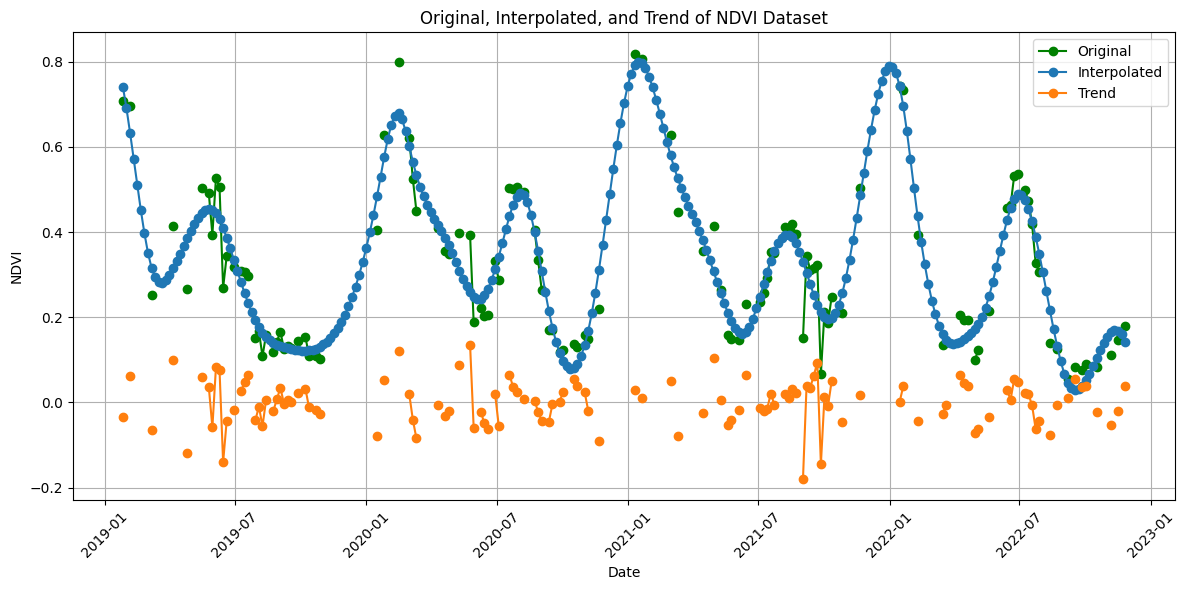

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

df = pd.read_csv('/content/s2-r2-2019-2022-correct-2.csv')

# Convert the "Date" column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Generate a regular date range with the desired interval
start_date = df["Date"].min()
end_date = df["Date"].max()
date_range = pd.date_range(start=start_date, end=end_date, freq="5D")

# Reindex the DataFrame with the new date range
df = df.set_index("Date")
df = df.reindex(date_range)

# Replace missing values with NaN
df["NDVI"] = df["NDVI"].replace(0, np.nan)


# Interpolate missing values using UnivariateSpline for different values of s
x = np.arange(len(df))
mask = ~np.isnan(df["NDVI"])
s_values = [0.35]
interpolated_values = []

for s in s_values:
    spline = UnivariateSpline(x[mask], df["NDVI"][mask], k=3, s=s)
    interpolated_values.append(spline(x))

# Reset the index and rename the columns
df = df.reset_index()
df = df.rename(columns={"index": "Date"})

# Get the trend by subtracting the interpolated values from the original data
trend = df["NDVI"] - interpolated_values[0]

plt.figure(figsize=(12, 6))

# Plot the original data, interpolated values, and trend
plt.plot(df["Date"], df["NDVI"], "o-", label="Original", color="green")
plt.plot(df["Date"], interpolated_values[0], "o-", label="Interpolated")
plt.plot(df["Date"], trend, "o-", label="Trend")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original, Interpolated, and Trend of NDVI Dataset")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


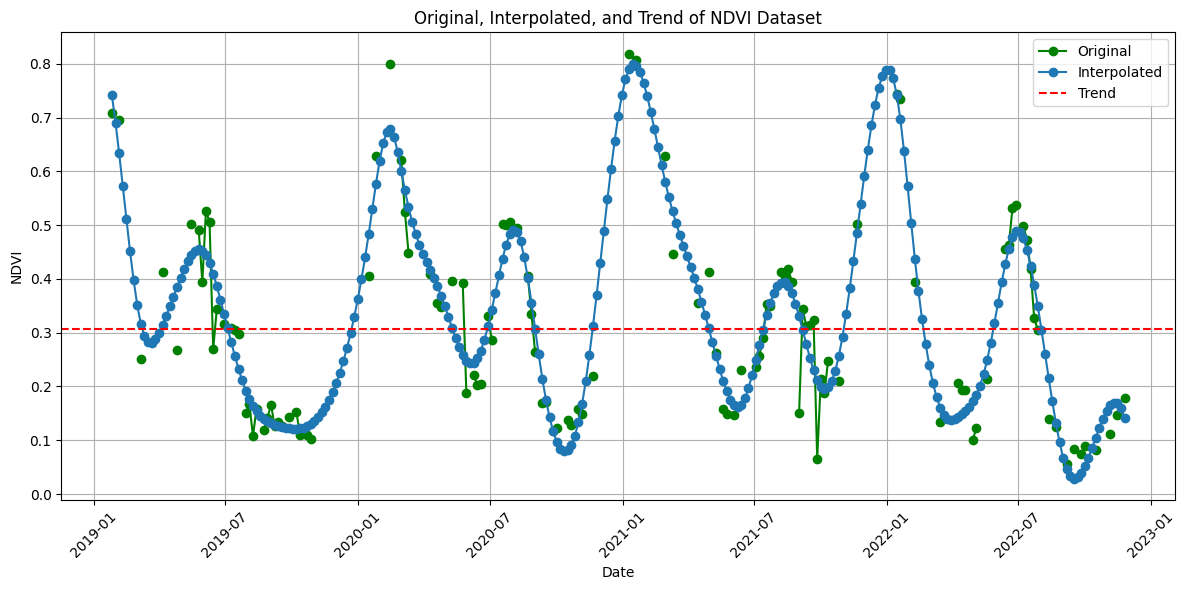

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

df = pd.read_csv('/content/s2-r2-2019-2022-correct-2.csv')

# Convert the "Date" column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Generate a regular date range with the desired interval
start_date = df["Date"].min()
end_date = df["Date"].max()
date_range = pd.date_range(start=start_date, end=end_date, freq="5D")

# Reindex the DataFrame with the new date range
df = df.set_index("Date")
df = df.reindex(date_range)

# Replace missing values with NaN
df["NDVI"] = df["NDVI"].replace(0, np.nan)

# Interpolate missing values using UnivariateSpline for different values of s
x = np.arange(len(df))
mask = ~np.isnan(df["NDVI"])
s_values = [0.35]
interpolated_values = []

for s in s_values:
    spline = UnivariateSpline(x[mask], df["NDVI"][mask], k=3, s=s)
    interpolated_values.append(spline(x))

# Reset the index and rename the columns
df = df.reset_index()
df = df.rename(columns={"index": "Date"})

# Calculate the mean as the trend
trend = np.mean(df["NDVI"])

plt.figure(figsize=(12, 6))

# Plot the original data, interpolated values, and trend
plt.plot(df["Date"], df["NDVI"], "o-", label="Original", color="green")
plt.plot(df["Date"], interpolated_values[0], "o-", label="Interpolated")
plt.axhline(trend, color="red", linestyle="--", label="Trend")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original, Interpolated, and Trend of NDVI Dataset")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: ignored

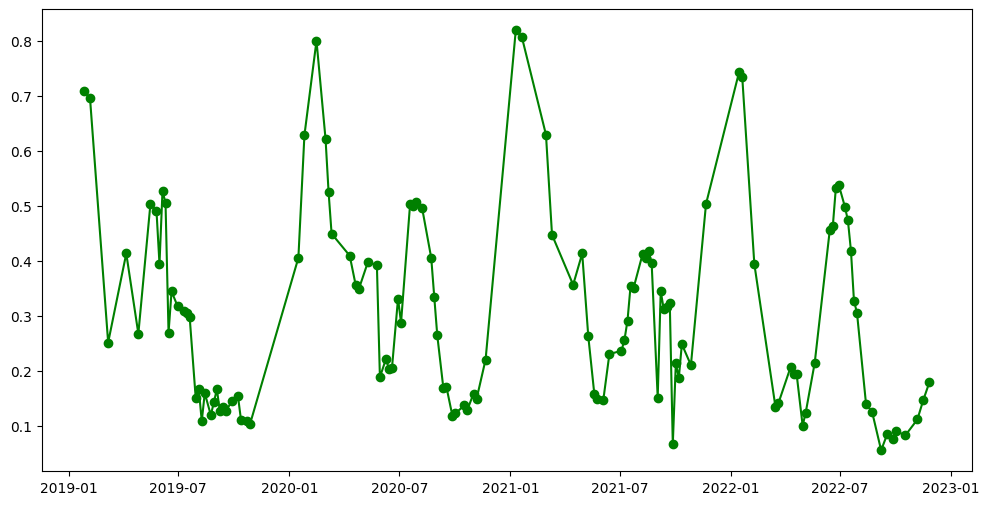

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/s2-r2-2019-2022-correct-2.csv')

# Convert the "Date" column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Generate a regular date range with the desired interval
start_date = df["Date"].min()
end_date = df["Date"].max()
date_range = pd.date_range(start=start_date, end=end_date, freq="5D")

# Reindex the DataFrame with the new date range
df = df.set_index("Date")
df = df.reindex(date_range)

# Replace missing values with NaN
df["NDVI"] = df["NDVI"].replace(0, np.nan)

# Interpolate missing values using UnivariateSpline for different values of s
x = np.arange(len(df))
mask = ~np.isnan(df["NDVI"])
s_values = [0.35]
interpolated_values = []

for s in s_values:
    spline = UnivariateSpline(x[mask], df["NDVI"][mask], k=3, s=s)
    interpolated_values.append(spline(x))

# Reset the index and rename the columns
df = df.reset_index()
df = df.rename(columns={"index": "Date"})

# Remove rows with missing values
df = df.dropna()

# Calculate the trend using linear regression
X = df.index.values.reshape(-1, 1)
y = df["NDVI"]
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

plt.figure(figsize=(12, 6))

# Plot the original data, interpolated values, and trend
plt.plot(df["Date"], df["NDVI"], "o-", label="Original", color="green")
plt.plot(df["Date"], interpolated_values[0], "o-", label="Interpolated")
plt.plot(df["Date"], trend, label="Trend")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original, Interpolated, and Trend of NDVI Dataset")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


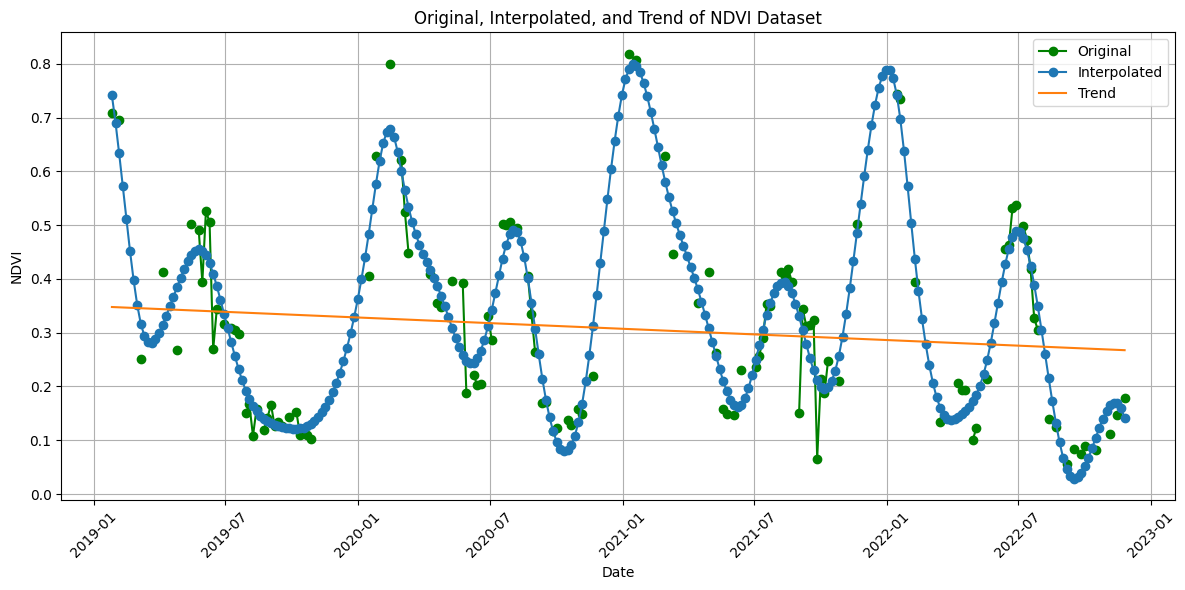

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/s2-r2-2019-2022-correct-2.csv')

# Convert the "Date" column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Generate a regular date range with the desired interval
start_date = df["Date"].min()
end_date = df["Date"].max()
date_range = pd.date_range(start=start_date, end=end_date, freq="5D")

# Reindex the DataFrame with the new date range
df = df.set_index("Date")
df = df.reindex(date_range)

# Replace missing values with NaN
df["NDVI"] = df["NDVI"].replace(0, np.nan)

# Interpolate missing values using UnivariateSpline for different values of s
x = np.arange(len(df))
mask = ~np.isnan(df["NDVI"])
s_values = [0.35]
interpolated_values = []

for s in s_values:
    spline = UnivariateSpline(x[mask], df["NDVI"][mask], k=3, s=s)
    interpolated_values.append(spline(x))

# Reset the index and rename the columns
df = df.reset_index()
df = df.rename(columns={"index": "Date"})

# Remove rows with missing values
df_trend = df.dropna()

# Calculate the trend using linear regression
X = df_trend.index.values.reshape(-1, 1)
y = df_trend["NDVI"]
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

plt.figure(figsize=(12, 6))

# Plot the original data, interpolated values, and trend
plt.plot(df["Date"], df["NDVI"], "o-", label="Original", color="green")
plt.plot(df["Date"], interpolated_values[0][:len(df)], "o-", label="Interpolated")
plt.plot(df_trend["Date"], trend, label="Trend")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original, Interpolated, and Trend of NDVI Dataset")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
